In [1]:
pip install datapackage

Note: you may need to restart the kernel to use updated packages.


In [157]:
pip install pydotplus

     |████████████████████████████████| 278 kB 1.9 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=6427e33840acf49f3c76d05da825be91e489ae91746f0a16d7a1f0a04a838303
  Stored in directory: /Users/Dani/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### A) PREPARATION OF THE DATASET

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datapackage import Package

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, mean_squared_error as MSE , silhouette_score

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

pd.options.mode.chained_assignment = None # To avoid set warning messages when I update a dataframe column using the df columns itself

In [15]:
package = Package('https://datahub.io/sports-data/spanish-la-liga/datapackage.json')

columns_package = ['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','B365H','B365D','B365A']

dictionary_variables = {'Div':'League Division','Date':'Match Date (dd/mm/yy)','Time':'Match Time','HomeTeam':'Home Team','AwayTeam':'Away Team','FTHG':'Full Time Home Team Goals','FTAG':'Full Time Away Team Goals','FTR':'Full Time Result (H Home Win, D Draw, A Away Win)','HS':'Home Team Shots','AS':'Away Team Shots','HST':'Home Team Shots on Target','AST':'Away Team Shots on Target','B365H':'Bet365 home win odds','B365D':'Bet365 draw odds','B365A':'Bet365 away win odds','season':'number of season'}

# Create historical data : season 2009-2010 to 2018-2019

historical_data = pd.DataFrame()

for resource in package.resources:
        if resource.descriptor['datahub']['type'] == 'derived/csv':
            x = pd.DataFrame(data = resource.read())
            x = x.drop(x.columns[range(25,len(x.columns))], axis=1)
            x.columns = columns_package
            x = x.drop(['HTHG','HTAG','HTR','HF','AF','HC','AC','HY','AY','HR','AR'], axis = 1)
            x['season'] = resource.name[7:11]
            historical_data = historical_data.append(x) 

In [8]:
# Solution 2 to create the dataset from the season 2009-2010 to 2018-2019

    # Creating the foundations with the first season

historical_data = pd.read_csv('https://www.football-data.co.uk/mmz4281/0910/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
historical_data['season'] = '0910'

    # Appending the following seasons

hist_data_1011 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1011/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
hist_data_1112 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1112/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
hist_data_1213 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1213/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
hist_data_1314 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1314/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
hist_data_1415 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1415/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
hist_data_1516 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1516/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
hist_data_1617 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1617/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
hist_data_1718 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1718/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
hist_data_1819 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1819/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])

hist_data_1011['season'] = '1011'
hist_data_1112['season'] = '1112'
hist_data_1213['season'] = '1213'
hist_data_1314['season'] = '1314'
hist_data_1415['season'] = '1415'
hist_data_1516['season'] = '1516'
hist_data_1617['season'] = '1617'
hist_data_1718['season'] = '1718'
hist_data_1819['season'] = '1819'

historical_data = historical_data.append(hist_data_1011)
historical_data = historical_data.append(hist_data_1112)
historical_data = historical_data.append(hist_data_1213)
historical_data = historical_data.append(hist_data_1314)
historical_data = historical_data.append(hist_data_1415)
historical_data = historical_data.append(hist_data_1516)
historical_data = historical_data.append(hist_data_1617)
historical_data = historical_data.append(hist_data_1718)
historical_data = historical_data.append(hist_data_1819)

In [16]:
# Append season 2019-2020

season_1920 = pd.read_csv('https://www.football-data.co.uk/mmz4281/1920/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
season_1920['season'] = '1920'
historical_data = historical_data.append(season_1920)

In [17]:
# Current season (2020-2021)

season_2021 = pd.read_csv('http://www.football-data.co.uk/mmz4281/2021/SP1.csv', header = 0, usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A'])
season_2021['season'] = '2021'
historical_data = historical_data.append(season_2021)

# Changing Date type

historical_data['Date'] = pd.to_datetime(historical_data['Date'], dayfirst = True)

In [18]:
historical_data.to_excel('historical_data.xlsx')

In [19]:
# Variables definition

dictionary_variables = {'Div':'League Division','Date':'Match Date (dd/mm/yy)','Time':'Match Time','HomeTeam':'Home Team','AwayTeam':'Away Team','FTHG':'Full Time Home Team Goals','FTAG':'Full Time Away Team Goals','FTR':'Full Time Result (H Home Win, D Draw, A Away Win)','HS':'Home Team Shots','AS':'Away Team Shots','HST':'Home Team Shots on Target','AST':'Away Team Shots on Target','B365H':'Bet365 home win odds','B365D':'Bet365 draw odds','B365A':'Bet365 away win odds','season':'number of season'}

dictionary_variables

{'Div': 'League Division',
 'Date': 'Match Date (dd/mm/yy)',
 'Time': 'Match Time',
 'HomeTeam': 'Home Team',
 'AwayTeam': 'Away Team',
 'FTHG': 'Full Time Home Team Goals',
 'FTAG': 'Full Time Away Team Goals',
 'FTR': 'Full Time Result (H Home Win, D Draw, A Away Win)',
 'HS': 'Home Team Shots',
 'AS': 'Away Team Shots',
 'HST': 'Home Team Shots on Target',
 'AST': 'Away Team Shots on Target',
 'B365H': 'Bet365 home win odds',
 'B365D': 'Bet365 draw odds',
 'B365A': 'Bet365 away win odds',
 'season': 'number of season'}

Now a clasification by season/team and date by date is needed to calculate the trends in terms of points, winning/lossing streaks, goals, shoots,etc.

In [20]:
# Table by season|HomeTeam|Date

aux_table_1 = pd.DataFrame(historical_data.groupby(['season','HomeTeam', 'Date'])['Div'].count()).reset_index()
aux_table_1.drop(columns =['Div'], inplace=True)
aux_table_1.rename(columns={"HomeTeam": "Team"}, inplace = True)
aux_table_1['Home/Away'] = 'H'

# Table by season|AwayTeam|Date
aux_table_2 = pd.DataFrame(historical_data.groupby(['season','AwayTeam', 'Date'])['Div'].count()).reset_index()
aux_table_2.drop(columns =['Div'], inplace=True)
aux_table_2.rename(columns={"AwayTeam": "Team"}, inplace = True)
aux_table_2['Home/Away'] = 'A'

# Table by season|Team|Date
aux_table = aux_table_1.append(aux_table_2)
aux_table.reset_index(inplace=True)
aux_table.drop(columns =['index'], inplace=True)

# Assigning number of match
aux_table.sort_values(by=['season','Team','Date'], ascending = True, inplace = True)
aux_table['match']  = aux_table.groupby(['season', 'Team']).cumcount() + 1

Now I will add the information contained in the historica dataset

In [21]:
# Adding the variables from historical dataset

historical_acc_1 = aux_table.merge(historical_data, how = 'inner', left_on=['Date','Team'], right_on=['Date','HomeTeam'])
historical_acc_2 = aux_table.merge(historical_data, how = 'inner', left_on=['Date','Team'], right_on=['Date','AwayTeam'])
historical_acc = historical_acc_1.append(historical_acc_2)

# Rearranging

historical_acc.sort_values(by=['season_x','Team','Date'], inplace = True)

# Calculation of the points

historical_acc['victory']  = historical_acc['Home/Away'] == historical_acc['FTR'] 
historical_acc['draw'] = historical_acc['FTR'] == 'D'
historical_acc['points'] = (historical_acc['victory']) * 3 + historical_acc['draw']
                           
# Removing useless columns
                           
historical_acc.drop(labels=['HomeTeam','AwayTeam','season_y','victory','draw'], axis = 1, inplace = True)
historical_acc.rename(columns = {'season_x': 'season'}, inplace = True)

In the same way I calculated the points I will calculate the Goals/Shots/Shots in Target

In [22]:
# Calculation of the goals/shots/shots on target

historical_acc['in_home']  = historical_acc['Home/Away'] == 'H'
historical_acc['away_game']  = historical_acc['Home/Away'] == 'A'

# For

historical_acc['goals_for'] = (historical_acc['in_home'] * historical_acc['FTHG']) + (historical_acc['away_game'] * historical_acc['FTAG'])
historical_acc['shots_for'] = (historical_acc['in_home'] * historical_acc['HS']) + (historical_acc['away_game'] * historical_acc['AS'])
historical_acc['shots_target_for'] = (historical_acc['in_home'] * historical_acc['HST']) + (historical_acc['away_game'] * historical_acc['AST'])

# Against

historical_acc['goals_against'] = (historical_acc['in_home'] * historical_acc['FTAG']) + (historical_acc['away_game'] * historical_acc['FTHG'])
historical_acc['shots_against'] = (historical_acc['in_home'] * historical_acc['AS']) + (historical_acc['away_game'] * historical_acc['HS'])
historical_acc['shots_target_against'] = (historical_acc['in_home'] * historical_acc['AST']) + (historical_acc['away_game'] * historical_acc['HST'])

# Cleansing

historical_acc.reset_index(inplace = True)
historical_acc.drop(columns=['index','in_home','away_game','FTHG','FTAG','FTR','HS','AS','HST','AST'], inplace = True)
historical_acc = historical_acc[['season','Date','match','Team','Div','goals_for','goals_against','shots_for','shots_against','shots_target_for','shots_target_against','points']]


Calculating accumulated numbers

In [23]:
historical_acc['goals_for_acc'] = historical_acc.groupby(['season','Team'])['goals_for'].cumsum() - historical_acc['goals_for']
historical_acc['goals_against_acc'] = historical_acc.groupby(['season','Team'])['goals_against'].cumsum() - historical_acc['goals_against']
historical_acc['shots_for_acc'] = historical_acc.groupby(['season','Team'])['shots_for'].cumsum() - historical_acc['shots_for']
historical_acc['shots_against_acc'] = historical_acc.groupby(['season','Team'])['shots_against'].cumsum() - historical_acc['shots_against']
historical_acc['shots_target_for_acc'] = historical_acc.groupby(['season','Team'])['shots_target_for'].cumsum() - historical_acc['shots_target_for']
historical_acc['shots_target_against_acc'] = historical_acc.groupby(['season','Team'])['shots_target_against'].cumsum() - historical_acc['shots_target_against']
historical_acc['points_acc'] = historical_acc.groupby(['season','Team'])['points'].cumsum() - historical_acc['points']

Calculating ranking by round for each season

In [24]:
historical_acc['ranking'] = historical_acc.groupby(['season','match'])['points_acc'].rank(method='first', ascending=True).astype('int64')

**NOTE**

So far this would be enough to continue with the rest of the process to work on the next stages of the proccess.

Variables to add once a first draft is done:

    Potential of the team : budget ? average classification of the last 3-5-10 seasons ?
    Trends = goals / shots in the last 3-5-10 matches?
    Resting days = add matches from other competitions to see how many days the team rested and how many days they have for the next match
    Importance of the match = have they already won the ligue ?  relegated ? Is there anything at stake [important above all for the last 5 
    matches]
    Potential_AtHome_Away = % games won/lost/drawn by team

In terms of future simplicity the column 'match' will be added to historical_data

In [25]:
historical_data = pd.merge(historical_data,historical_acc[['Date','Team','match']],left_on=['Date','HomeTeam'],right_on = ['Date','Team'], how='left')
historical_data = pd.merge(historical_data,historical_acc[['Date','Team','match']],left_on=['Date','AwayTeam'],right_on = ['Date','Team'], how='left',suffixes=('_home','_away'))
historical_data = historical_data[['Div','Date','season','HomeTeam','AwayTeam','match_home','match_away','B365H','B365D','B365A','FTR']]

In [26]:
historical_data.to_excel('user_report/historical.xlsx')

In [27]:
columns_to_append= ['Date','Team','goals_for_acc','goals_against_acc','shots_for_acc','shots_against_acc','shots_target_for_acc','shots_target_against_acc','points_acc','ranking']

df_to_be_trained_home = historical_data.merge(historical_acc[columns_to_append], how = 'inner', left_on = ['Date','HomeTeam'], right_on =['Date','Team']).iloc[:,[12,13,14,15,16,17,18,19]]
df_to_be_trained_home = df_to_be_trained_home.add_suffix('_home')

df_to_be_trained_away = historical_data.merge(historical_acc[columns_to_append], how = 'inner', left_on = ['Date','AwayTeam'], right_on =['Date','Team']).iloc[:,[12,13,14,15,16,17,18,19]]
df_to_be_trained_away = df_to_be_trained_away.add_suffix('_away')


df_to_be_trained_aux = pd.concat([historical_data,df_to_be_trained_home,df_to_be_trained_away], axis = 1)
df_to_be_trained_aux.rename(columns={'FTR':'result','match_home':'match'}, inplace = True)

The final dataset to be trained will be the accumulated figures difference between the teams of that match at the time of the match

In [28]:
for col in df_to_be_trained_aux.columns:
    if col[-5:]  == '_home' and col[0:5] != 'match':
        df_to_be_trained_aux[col[:-5]]= df_to_be_trained_aux[col] - df_to_be_trained_aux[col[:-5]+'_away']
        df_to_be_trained_aux.drop(columns=col, axis = 1, inplace = True)
        
    elif col[-5:] =='_away' and col[0:4] != 'Team':
        
        df_to_be_trained_aux.drop(columns=col, axis = 1, inplace = True)
            
# Setting the difference in the classification df_to_be_trained_aux['ranking'] = df_to_be_trained_aux['ranking'] * - 1

In [29]:
columns = ['Div','season','match','HomeTeam','AwayTeam','goals_for_acc','goals_against_acc', 'shots_for_acc', 'shots_against_acc','shots_target_for_acc', 'shots_target_against_acc', 'points_acc','ranking','result','B365H','B365D','B365A']
final_dataset = df_to_be_trained_aux[columns]

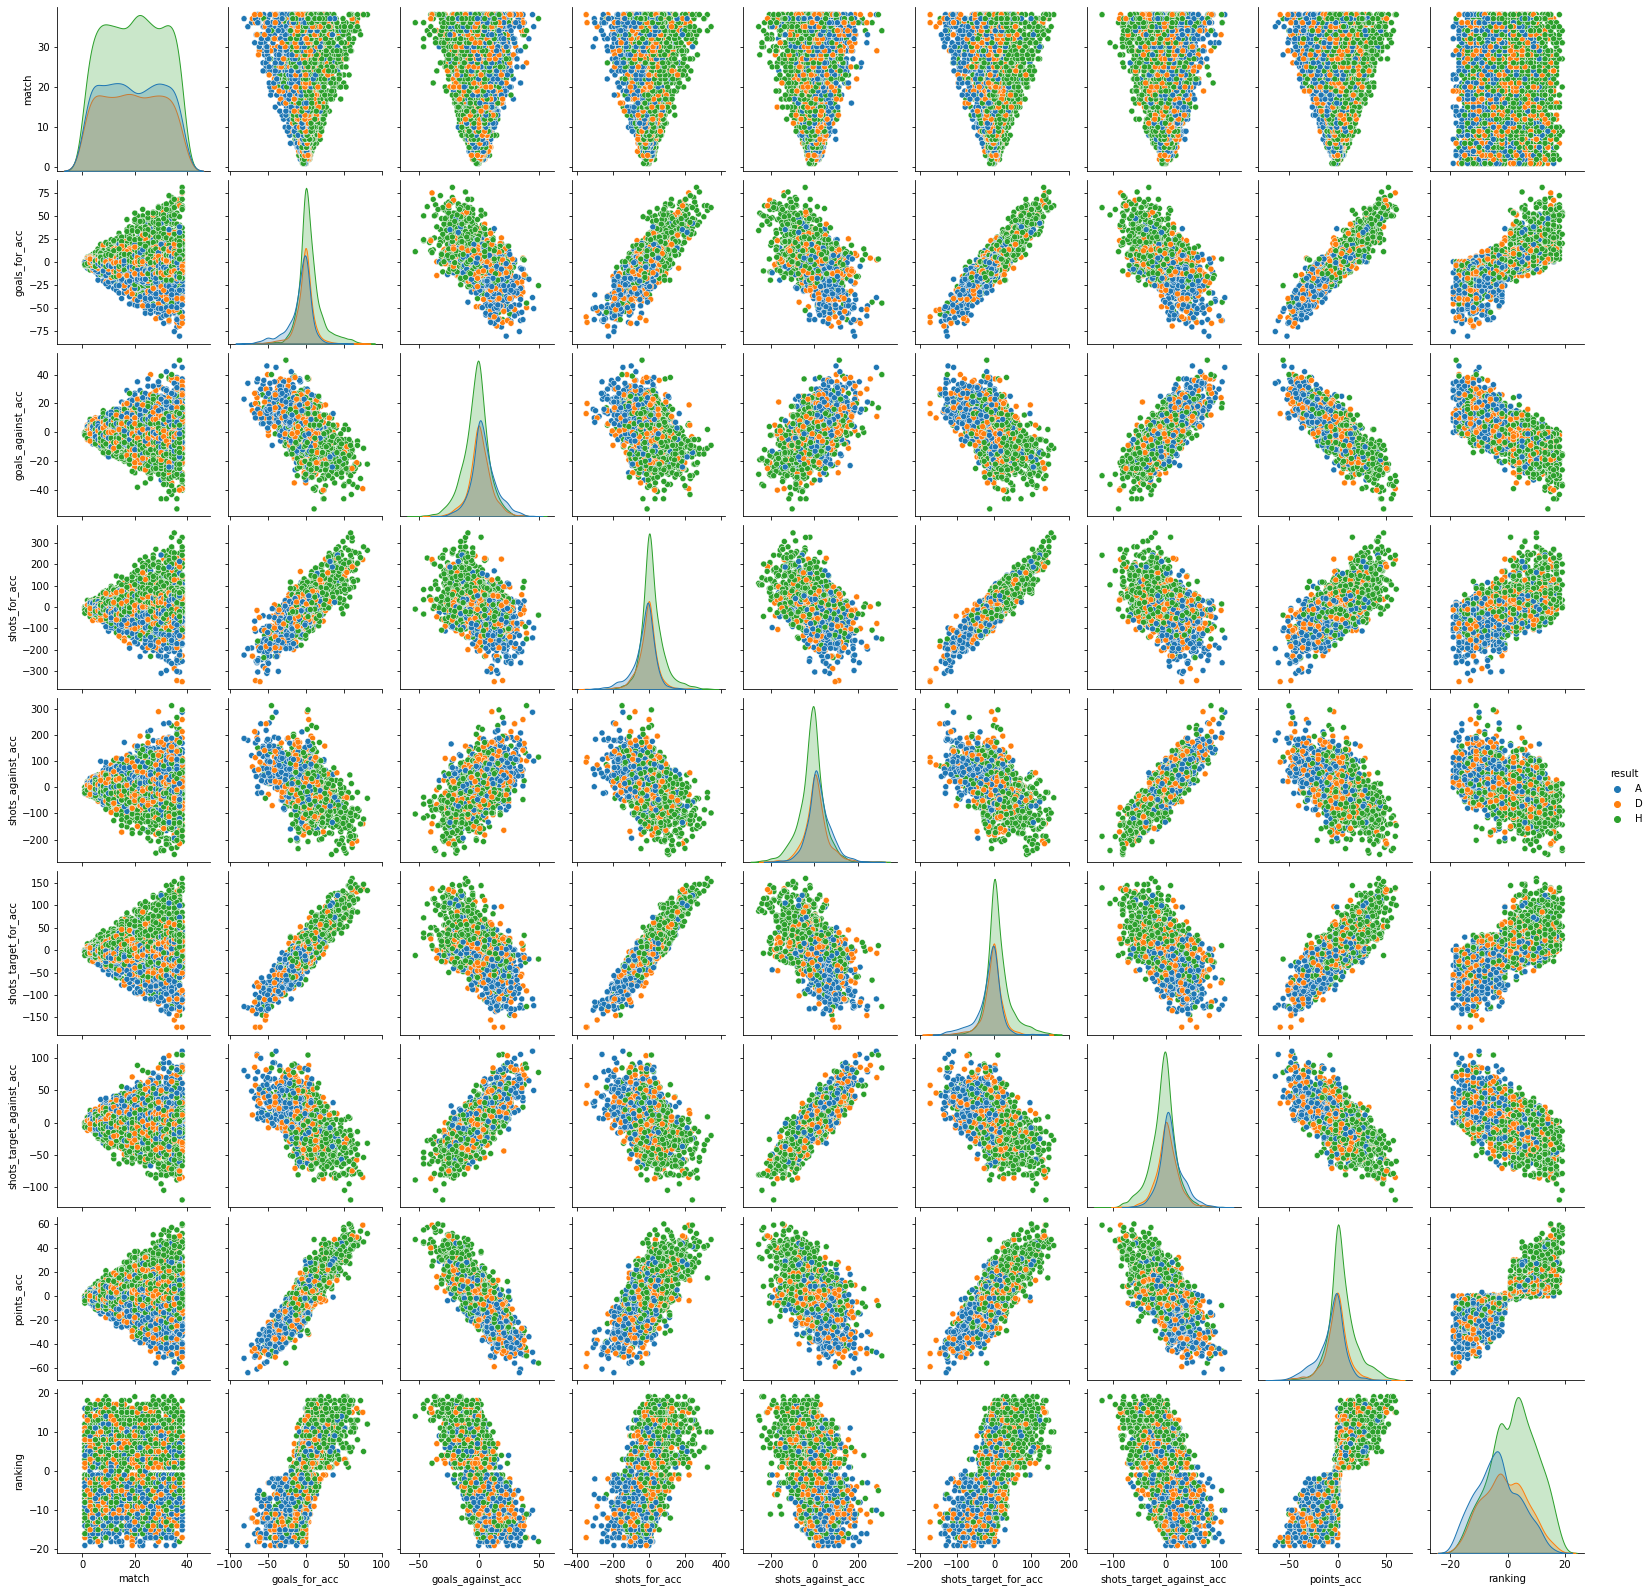

In [17]:
sns.pairplot(final_dataset.iloc[:,1:14], hue='result');

Make some comments on graphs: looks like wins and losses follow some pattters:

    1) Not surprisingly negative ranking values ( ranking of the home team minus the ranking the of the away team just before the game is played) are mostly home victories.
    
    2) Draws don't follow a clear pattern
    

Before modelling I need to encode the teams names and results.

### B) PREPARATION OF THE TRAIN/TEST DATASETS

#### PREPARING ENCONDING METHODS

In [18]:
lab_enc_teams = LabelEncoder()
lab_enc_results = LabelEncoder()
hot_enc_teams = OneHotEncoder()
teams_encoded = lab_enc_teams.fit_transform(historical_acc.Team.unique())
results_encoded = lab_enc_results.fit_transform(['H','D','A'])

In [19]:
final_dataset['HomeCode'] = lab_enc_teams.fit_transform(final_dataset[["HomeTeam"]].values.reshape(-1,))
final_dataset['AwayCode'] = lab_enc_teams.fit_transform(final_dataset[["AwayTeam"]].values.reshape(-1,))
final_dataset['result_code'] = lab_enc_results.fit_transform(final_dataset[['result']].values.reshape(-1,))

In [20]:
final_dataset.to_excel('user_report/final_dataset_ini.xlsx')

#### CHANGING SOME VARIABLES TYPES

In [21]:
# Fitting some format variables

categories = ['Div','season','HomeTeam','AwayTeam','result']

floats = ['B365H','B365D','B365A']

integers = ['season']


# Categories 

for item in categories:
    final_dataset[item] = final_dataset[item].astype('category')
    
# floats

for item in floats:
    final_dataset[item] = final_dataset[item].astype('float')
    
# integers

for item in integers:
    final_dataset[item] = final_dataset[item].astype('int64')

#### TRAINING AND STANDARIZING DATASET (checking whether accuracy could improve)

In [22]:
scaler = StandardScaler()

features = final_dataset.select_dtypes('integer').iloc[:,:-1]
                                
target = final_dataset['result_code']

#Training regular dataset 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state = 13)

#Normalized X_train and X_test datasetsdar

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.iloc[:,:-2]), columns = X_train.columns[:-2]) # I exclude Home and Away Team before  applying Standard Scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test.iloc[:,:-2]), columns = X_test.columns[:-2])
features_scaled = pd.DataFrame(scaler.transform(features.iloc[:,:-2]), columns = features.columns[:-2])

#### KMEANS - ARE THERE SIMILAR MATCHES ? 

Just in case and in advance I will apply Kmeans to the df_to_be_trained scaled dataset. In that way the dataset will be split and I could analize if accuracy is better for some of these clusters.

In [23]:
 kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
    
sse = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

In [24]:
# A list holds the silhouette coefficients for each 

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

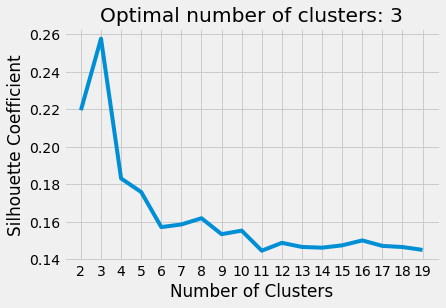

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Optimal number of clusters: '+ str(silhouette_coefficients.index(max(silhouette_coefficients))+2))
plt.show()

### C) TRYING FIRST ML MODELS

#### First look at different models

In [26]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(max_iter=10000)

# Instate dtc

dtc = DecisionTreeClassifier(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier()

# Instantiate lda

lda = LinearDiscriminantAnalysis(solver='svd')

# Instantiate gnb

gnb = GaussianNB()

#Instantiate svc

svc = SVC()

#Instantiate rfc

rfc = RandomForestClassifier(random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('DecisionTreeClassifier',dtc), ('K Nearest Neighbours', knn), ('LinearDiscriminantAnalysis', lda),('GaussianNB',gnb),('SVC',svc),('RandomForestClassifier',rfc)]

In [27]:
# Iterate over the pre-defined list of classifiers
model_list = []
scaled_list = []
accuracy_list = []
cross_val_score_mean = []

# Fit clf to the training set

for clf_name, clf in classifiers:    
 
    clf.fit(X_train, y_train)
    
    model_list.append(clf_name)
    scaled_list.append(0)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    
    accuracy_list.append(np.round(accuracy,decimals=2))
    cross_val_score_mean.append(np.round(sum(scores)/len(scores),decimals=2))
    
#Evaluate clf's accuracy on scaled train dataset

for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train_scaled, y_train)
    
    model_list.append(clf_name)
    scaled_list.append(1)
    
    # Predict y_pred
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
    accuracy_list.append(np.round(accuracy, decimals=2))
    cross_val_score_mean.append(np.round(sum(scores)/len(scores), decimals=2))
    
final_scoring_list = pd.DataFrame(np.column_stack([model_list, scaled_list, accuracy_list, cross_val_score_mean]), columns=['model', 'scaled', 'accuracy','mean_score_value'])
final_scoring_list['accuracy'] = pd.to_numeric(final_scoring_list['accuracy'])

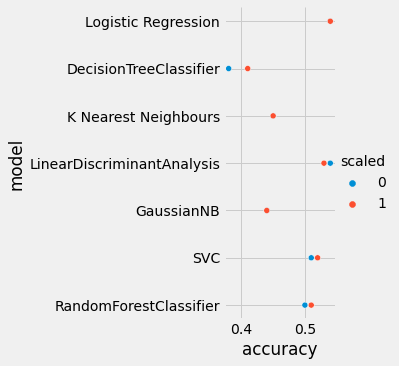

In [28]:
sns.relplot(
    data=final_scoring_list,
    x="accuracy", y="model",
    hue="scaled"
);

Better to use scaled dataset for models based on distances and the regular one on the decision tree ones. GausssianNB & KNN will be dismissed.

#### Decision Tree Classifier

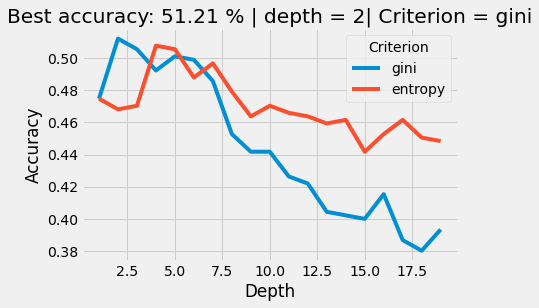

In [29]:
max_depth = 1
criterion = ['gini','entropy']
max_depth_results = []
criterion_results = []
accuracy_results = []

while max_depth <20:
    
    for item in criterion:
        dtc = DecisionTreeClassifier(criterion=item, max_depth=max_depth, random_state=1)
        dtc = dtc.fit(X_train, y_train)
        predictions = dtc.predict(X_test)
        max_depth_results.append(max_depth)
        criterion_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions))
        
    max_depth +=1

total_results = pd.DataFrame(list(zip(max_depth_results, criterion_results, accuracy_results)),columns=['Depth','Criterion','Accuracy'])

dtc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="Depth", y="Accuracy",
             hue="Criterion",
             data=total_results).set_title('Best accuracy: ' + str(np.round(dtc_max_acc.iloc[0,2]  * 100, 2)) + ' % | depth = ' + str(dtc_max_acc.iloc[0,0]) +'| Criterion = '+ dtc_max_acc.iloc[0,1]);

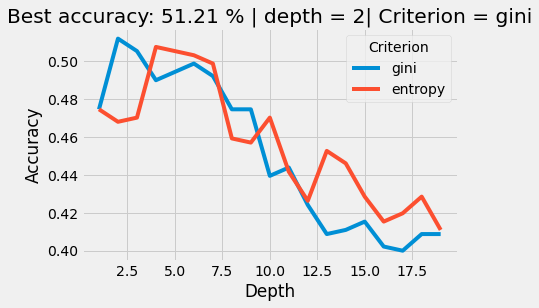

In [30]:
max_depth = 1
criterion = ['gini','entropy']
max_depth_results = []
criterion_results = []
accuracy_results = []

while max_depth <20:
    
    for item in criterion:
        dtc = DecisionTreeClassifier(criterion=item, max_depth=max_depth, random_state=1)
        dtc = dtc.fit(X_train_scaled, y_train)
        predictions_scaled = dtc.predict(X_test_scaled)
        max_depth_results.append(max_depth)
        criterion_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))
        
    max_depth +=1

total_results = pd.DataFrame(list(zip(max_depth_results, criterion_results, accuracy_results)),columns=['Depth','Criterion','Accuracy'])

dtc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="Depth", y="Accuracy",
             hue="Criterion",
             data=total_results).set_title('Best accuracy: ' + str(np.round(dtc_max_acc.iloc[0,2]  * 100, 2)) + ' % | depth = ' + str(dtc_max_acc.iloc[0,0]) +'| Criterion = '+ dtc_max_acc.iloc[0,1]);

##### Applying model with the best parameters

In [31]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=1)
dtc.fit(X_train, y_train)
predictions_dtc = dtc.predict(X_test)
predictions_prob_dtc = dtc.predict_proba(X_test)
predictions_dtc_all = dtc.predict(features)
predictions_prob_dtc_all = dtc.predict_proba(features)

##### Decision Tree Classifier - Features

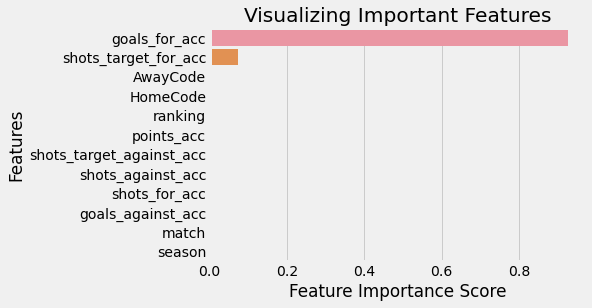

In [32]:
feature_imp = pd.Series(dtc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

#### Random Forest Classifier

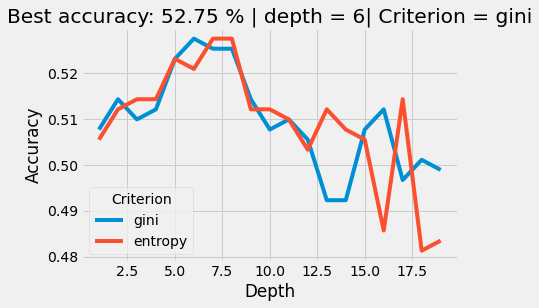

In [33]:
max_depth = 1
criterion = ['gini','entropy']
max_depth_results = []
criterion_results = []
accuracy_results = []

while max_depth <20:
    
    for item in criterion:
        rfc = RandomForestClassifier(criterion=item, max_depth=max_depth, random_state=1)
        rfc = rfc.fit(X_train, y_train)
        predictions = rfc.predict(X_test)
        max_depth_results.append(max_depth)
        criterion_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions))
        
    max_depth +=1

total_results = pd.DataFrame(list(zip(max_depth_results, criterion_results, accuracy_results)),columns=['Depth','Criterion','Accuracy'])

rfc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="Depth", y="Accuracy",
             hue="Criterion",
             data=total_results).set_title('Best accuracy: ' + str(np.round(rfc_max_acc.iloc[0,2]  * 100, 2)) + ' % | depth = ' + str(rfc_max_acc.iloc[0,0]) +'| Criterion = '+ rfc_max_acc.iloc[0,1]);

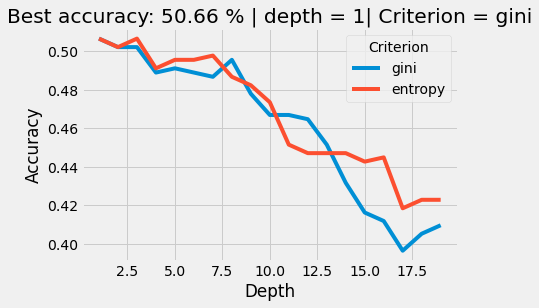

In [33]:
max_depth = 1
criterion = ['gini','entropy']
max_depth_results = []
criterion_results = []
accuracy_results = []

while max_depth <20:
    
    for item in criterion:
        rfc = DecisionTreeClassifier(criterion=item, max_depth=max_depth, random_state=1)
        rfc = rfc.fit(X_train_scaled, y_train)
        predictions_scaled = rfc.predict(X_test_scaled)
        max_depth_results.append(max_depth)
        criterion_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))
        
    max_depth +=1

total_results = pd.DataFrame(list(zip(max_depth_results, criterion_results, accuracy_results)),columns=['Depth','Criterion','Accuracy'])

rfc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="Depth", y="Accuracy",
             hue="Criterion",
             data=total_results).set_title('Best accuracy: ' + str(np.round(rfc_max_acc.iloc[0,2]  * 100, 2)) + ' % | depth = ' + str(rfc_max_acc.iloc[0,0]) +'| Criterion = '+ rfc_max_acc.iloc[0,1]);

##### Applying model with the best parameters

In [34]:
rfc = RandomForestClassifier(criterion='gini',max_depth=6, random_state=1)
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)
predictions_prob_rfc = rfc.predict_proba(X_test)
predictions_rfc_all = rfc.predict(features)
predictions_prob_rfc_all = rfc.predict_proba(features)

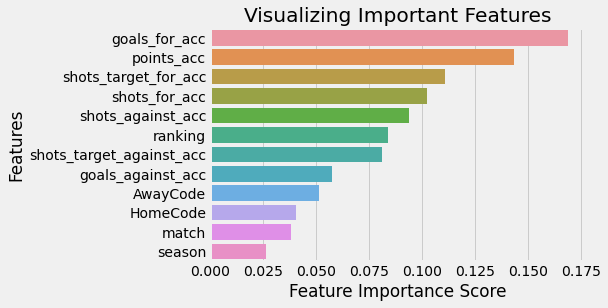

In [35]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Logistic Regression

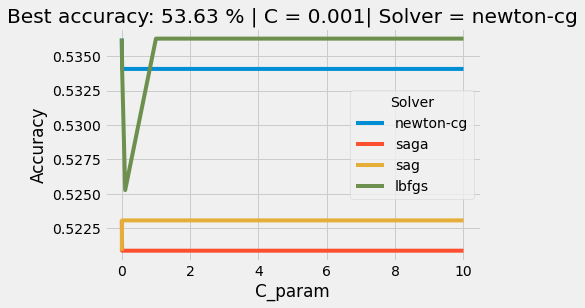

In [36]:
C_param_range = [0.001,0.01,0.1,1,10]
solver = ['newton-cg','saga','sag','lbfgs']
C_param_result = []
solver_results = []
accuracy_results = []


for i in C_param_range:
    
    for item in solver:
        
        lr = LogisticRegression(penalty='l2',solver=item, multi_class = 'multinomial', max_iter=10000,random_state=42,C=i)
        lr = lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        C_param_result.append(i)
        solver_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions))
        

total_results = pd.DataFrame(list(zip(C_param_result,solver_results, accuracy_results)),columns=['C_param','Solver','Accuracy'])

lr_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="C_param", y="Accuracy",
             hue="Solver",
             data=total_results).set_title('Best accuracy: ' + str(np.round(lr_max_acc.iloc[0,2]  * 100, 2)) + ' % | C = ' + str(lr_max_acc.iloc[0,0]) +'| Solver = '+ lr_max_acc.iloc[0,1]);

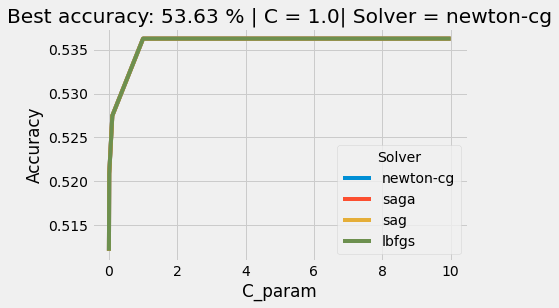

In [37]:
C_param_range = [0.001,0.01,0.1,1,10]
solver = ['newton-cg','saga','sag','lbfgs']
C_param_result = []
solver_results = []
accuracy_results = []


for i in C_param_range:
    
    for item in solver:
        
        lr = LogisticRegression(penalty='l2',solver=item, multi_class = 'multinomial', max_iter=10000,random_state=42,C=i)
        lr = lr.fit(X_train_scaled, y_train)
        predictions_scaled = lr.predict(X_test_scaled)
        C_param_result.append(i)
        solver_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))
        

total_results = pd.DataFrame(list(zip(C_param_result,solver_results, accuracy_results)),columns=['C_param','Solver','Accuracy'])

lr_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="C_param", y="Accuracy",
             hue="Solver",
             data=total_results).set_title('Best accuracy: ' + str(np.round(lr_max_acc.iloc[0,2]  * 100, 2)) + ' % | C = ' + str(lr_max_acc.iloc[0,0]) +'| Solver = '+ lr_max_acc.iloc[0,1]);

##### Applying model with the best parameters

In [39]:
lr = LogisticRegression(penalty='l2',solver='newton-cg', multi_class = 'multinomial', max_iter=10000,random_state=42,C=0.001)
lr = lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
predictions_prob_lr = lr.predict_proba(X_test)
predictions_lr_all = lr.predict(features)
predictions_prob_lr_all = lr.predict_proba(features)
#X_test_scaled = pd.DataFrame(scaler.transform(X_test.iloc[:,:-2]), columns = X_test.columns[:-2])

#### K-Neighbors Classifier

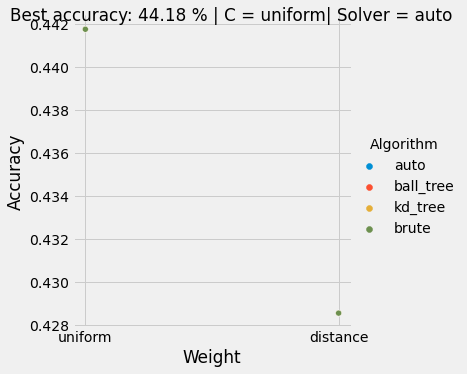

In [40]:
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
weights_results = []
algorithm_results = []
accuracy_results = []


for i in weights:
    
    for item in algorithm:
        
        knc = KNeighborsClassifier(n_neighbors=3,weights=i,algorithm = item)
        knc = knc.fit(X_train, y_train)
        predictions = knc.predict(X_test)
        weights_results.append(i)
        algorithm_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions))
        

total_results = pd.DataFrame(list(zip(weights_results,algorithm_results, accuracy_results)),columns=['Weight','Algorithm','Accuracy'])

knc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

knc_plot = sns.relplot(x="Weight", y="Accuracy",
             hue="Algorithm",
             data=total_results)

knc_plot.fig.suptitle('Best accuracy: ' + str(np.round(knc_max_acc.iloc[0,2]  * 100, 2)) + ' % | C = ' + str(knc_max_acc.iloc[0,0]) +'| Solver = '+ knc_max_acc.iloc[0,1]);


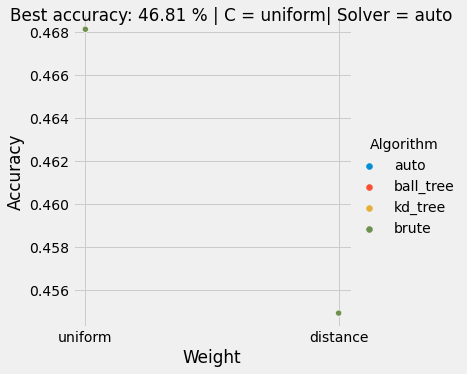

In [41]:
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
weights_results = []
algorithm_results = []
accuracy_results = []


for i in weights:
    
    for item in algorithm:
        
        knc = KNeighborsClassifier(n_neighbors=3,weights=i,algorithm = item)
        knc = knc.fit(X_train_scaled, y_train)
        predictions_scaled = knc.predict(X_test_scaled)
        weights_results.append(i)
        algorithm_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))
        

total_results = pd.DataFrame(list(zip(weights_results,algorithm_results, accuracy_results)),columns=['Weight','Algorithm','Accuracy'])

knc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

knc_plot = sns.relplot(x="Weight", y="Accuracy",
             hue="Algorithm",
             data=total_results)

knc_plot.fig.suptitle('Best accuracy: ' + str(np.round(knc_max_acc.iloc[0,2]  * 100, 2)) + ' % | C = ' + str(knc_max_acc.iloc[0,0]) +'| Solver = '+ knc_max_acc.iloc[0,1]);

This model won't be considered for having an accuracy 7pp lower than the previous ones

#### Linear Discriminant Analysis

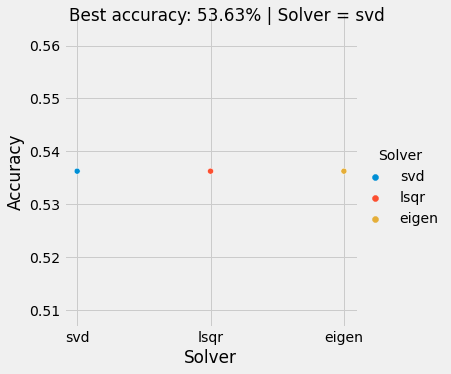

In [42]:
solvers = ['svd','lsqr','eigen']
solvers_results = []
accuracy_results = []

    
for item in solvers:
        
    lda = LinearDiscriminantAnalysis(solver = item)
    lda = lda.fit(X_train, y_train)
    predictions = lda.predict(X_test)
    solvers_results.append(item)
    accuracy_results.append(metrics.accuracy_score(y_test,predictions))

total_results = pd.DataFrame(list(zip(solvers_results, accuracy_results)),columns=['Solver','Accuracy'])

lda_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

lda_plot = sns.relplot(x="Solver", y="Accuracy",
             hue="Solver",
             data=total_results)
lda_plot.fig.suptitle('Best accuracy: ' + str(np.round(lda_max_acc.iloc[0,1]  * 100, 2)) +'% | Solver = '+ lda_max_acc.iloc[0,0]);


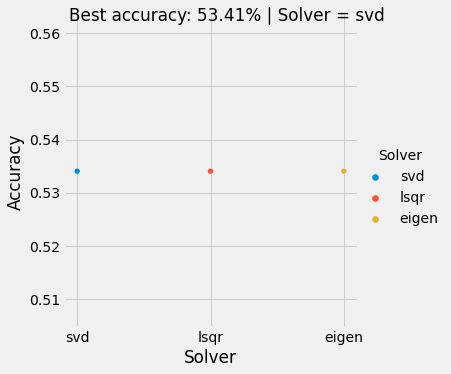

In [43]:
solvers = ['svd','lsqr','eigen']
solvers_results = []
accuracy_results = []

    
for item in solvers:
        
    lda = LinearDiscriminantAnalysis(solver = item)
    lda = lda.fit(X_train_scaled, y_train)
    predictions_scaled = lda.predict(X_test_scaled)
    solvers_results.append(item)
    accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))

total_results = pd.DataFrame(list(zip(solvers_results, accuracy_results)),columns=['Solver','Accuracy'])

lda_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

lda_plot = sns.relplot(x="Solver", y="Accuracy",
             hue="Solver",
             data=total_results)

lda_plot.fig.suptitle('Best accuracy: ' + str(np.round(lda_max_acc.iloc[0,1]  * 100, 2)) +'% | Solver = '+ lda_max_acc.iloc[0,0]);

#### Applying model with the best parameters

In [44]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda = lda.fit(X_train, y_train)
predictions_lda = lda.predict(X_test)
predictions_prob_lda = lda.predict_proba(X_test)
predictions_lda_all = lda.predict(features)
predictions_prob_lda_all = lda.predict_proba(features)

#### SVC

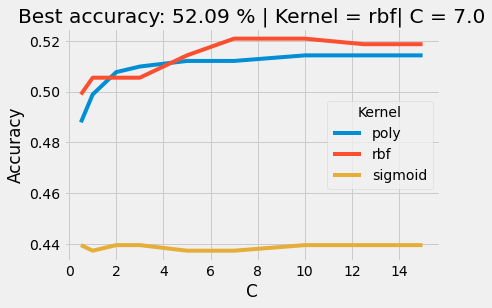

In [45]:
kernel = ['poly', 'rbf', 'sigmoid']
c_list = [0.5,1.0,2.0,3.0,5.0,7.0,10.0,12.5,15.0]
kernel_results = []
c_results = []
accuracy_results = []


for c in c_list:
    
    for item in kernel:
        
        svc = SVC(kernel = item, C = c)
        svc = svc.fit(X_train, y_train)
        predictions_svc = svc.predict(X_test)
        kernel_results.append(item)
        c_results.append(c)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_svc))
        

total_results = pd.DataFrame(list(zip(kernel_results, c_results, accuracy_results)),columns=['Kernel','C','Accuracy'])

svc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="C", y="Accuracy",hue="Kernel",data=total_results)

plt.title('Best accuracy: ' + str(np.round(svc_max_acc.iloc[0,2]  * 100, 2)) + ' % | Kernel = ' + str(svc_max_acc.iloc[0,0]) +'| C = '+ str(np.round(svc_max_acc.iloc[0,1])));

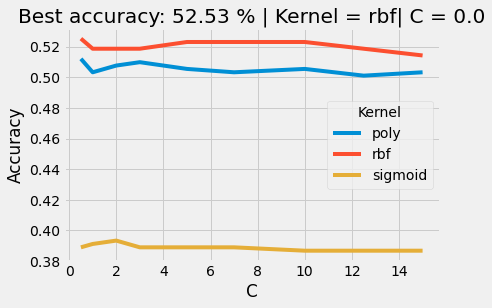

In [46]:
kernel = ['poly', 'rbf', 'sigmoid']
c_list = [0.5,1.0,2.0,3.0,5.0,7.0,10.0,12.5,15.0]
kernel_results = []
c_results = []
accuracy_results = []


for c in c_list:
    
    for item in kernel:
        
        svc = SVC(kernel = item, C = c)
        svc = svc.fit(X_train_scaled, y_train)
        predictions_svc = svc.predict(X_test_scaled)
        kernel_results.append(item)
        c_results.append(c)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_svc))
        

total_results = pd.DataFrame(list(zip(kernel_results, c_results, accuracy_results)),columns=['Kernel','C','Accuracy'])

svc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="C", y="Accuracy",hue="Kernel",data=total_results)

plt.title('Best accuracy: ' + str(np.round(svc_max_acc.iloc[0,2]  * 100, 2)) + ' % | Kernel = ' + str(svc_max_acc.iloc[0,0]) +'| C = '+ str(np.round(svc_max_acc.iloc[0,1])));

In [47]:
svc = SVC(kernel = 'rbf', C = 7.0, probability=True)
svc = svc.fit(X_train, y_train)
predictions_svc = svc.predict(X_test)
predictions_prob_svc = svc.predict_proba(X_test)
predictions_svc_all = svc.predict(features)
predictions_prob_svc_all = svc.predict_proba(features)

##### Re-building the test dataset with the different results

In [48]:
kmeans = KMeans(n_clusters= 3 ,**kmeans_kwargs)
kmeans.fit(X_train_scaled)
k_predictions = kmeans.predict(X_test_scaled)
k_predictions_all = kmeans.predict(features_scaled)

In [49]:
models = {'dtc':[predictions_dtc_all,predictions_prob_dtc_all,dtc], 'rfc':[predictions_rfc_all, predictions_prob_rfc_all,rfc], 'lr':[predictions_lr_all,predictions_prob_lr_all,lr],'lda':[predictions_lda_all,predictions_prob_lda_all,lda],'svc':[predictions_svc_all, predictions_prob_svc_all,svc]}

In [50]:
final_dataset_fin = pd.DataFrame()
    
for model in models:
    
    final_dataset_aux = historical_data.copy()
    final_dataset_aux['cluster'] = k_predictions_all
    final_dataset_aux['Prob_Home%'] = np.round(models[model][1][:,2]*100,2)
    final_dataset_aux['Prob_Draw%'] = np.round(models[model][1][:,1]*100,2)
    final_dataset_aux['Prob_Away%'] = np.round(models[model][1][:,0]*100,2)
    final_dataset_aux['Prediction'] = models[model][0]
    final_dataset_aux['Prediction'] = lab_enc_results.inverse_transform(final_dataset_aux['Prediction'])
    final_dataset_aux['hit_result'] = (final_dataset_aux['FTR'] == final_dataset_aux['Prediction'])*1
    final_dataset_aux['paid_quota'] = ((final_dataset_aux['FTR'] == 'A') * final_dataset_aux['B365A']) + ((final_dataset_aux['FTR'] == 'D') * final_dataset_aux['B365D']) + ((final_dataset_aux['FTR'] == 'H') * final_dataset_aux['B365H'])
    final_dataset_aux['Prize'] = final_dataset_aux['hit_result'] * final_dataset_aux['paid_quota']
    final_dataset_aux['Profit'] =  final_dataset_aux['Prize'] - 1
    final_dataset_aux['Difficulty'] = final_dataset_aux['paid_quota'].astype('int')
    final_dataset_aux['Model'] = model
    final_dataset_fin = final_dataset_fin.append(final_dataset_aux)
    

In [51]:
final_dataset_fin.to_excel('user_report/final_dataset_fin.xlsx')

#### Applying all of this to the coming matches

In [52]:
coming_round = pd.read_excel('coming_round.xlsx', names=['index','id','HomeTeam','AwayTeam','B365H','B365D','B365A'], dtypes = ['int','int','str','str','float','float','float'])
coming_round.drop(['index'], axis = 1, inplace=True)

In [53]:
#Current season 
current_season = max(historical_data['season'])

# Filtering historical dataset by current season
historical_acc_current_season = historical_acc[historical_acc['season'] == current_season]

# Calculating the latest match played by each team
historical_acc_current_season_round = historical_acc_current_season.groupby('Team')[['match']].max().reset_index()

# Historical dataset figures at the latest game
historical_acc_current_season_match = historical_acc_current_season_round.merge(historical_acc_current_season, left_on=['Team','match'],right_on=['Team','match'])

# We need to adjust accumulated figures and update classification

historical_acc_current_season_match['goals_for_acc'] = historical_acc_current_season_match['goals_for_acc'] + historical_acc_current_season_match['goals_for']
historical_acc_current_season_match['goals_against_acc'] = historical_acc_current_season_match['goals_against_acc'] + historical_acc_current_season_match['goals_against']
historical_acc_current_season_match['shots_for_acc'] = historical_acc_current_season_match['shots_for_acc'] + historical_acc_current_season_match['shots_for']
historical_acc_current_season_match['shots_against_acc'] = historical_acc_current_season_match['shots_against_acc'] + historical_acc_current_season_match['shots_against']
historical_acc_current_season_match['shots_target_for_acc'] = historical_acc_current_season_match['shots_target_for_acc'] + historical_acc_current_season_match['shots_target_for']
historical_acc_current_season_match['shots_target_against_acc'] = historical_acc_current_season_match['shots_target_against_acc'] + historical_acc_current_season_match['shots_target_against']
historical_acc_current_season_match['points_acc'] = historical_acc_current_season_match['points_acc'] + historical_acc_current_season_match['points']
historical_acc_current_season_match['ranking'] = historical_acc_current_season_match['points_acc'].rank(method='first', ascending=False)

# Merging coming round and accumulated figures

coming_round_home = coming_round.merge(historical_acc_current_season_match[['Div','season','match','Team','goals_for_acc','goals_against_acc','shots_for_acc','shots_against_acc','shots_target_for_acc','shots_target_against_acc','points_acc','ranking']], left_on='HomeTeam', right_on ='Team')
coming_round_away = coming_round.merge(historical_acc_current_season_match[['Div','season','match','Team','goals_for_acc','goals_against_acc','shots_for_acc','shots_against_acc','shots_target_for_acc','shots_target_against_acc','points_acc','ranking']], left_on='AwayTeam', right_on ='Team', suffixes=('','_away'))
coming_round_aux = coming_round_home[['Div','season','match','HomeTeam','AwayTeam','goals_for_acc','goals_against_acc','shots_for_acc','shots_against_acc','shots_target_for_acc','shots_target_against_acc','points_acc','ranking','B365H','B365D','B365A']]

# Adjusting the accumulated numbers

coming_round_aux['HomeCode'] = lab_enc_teams.fit_transform(coming_round_aux[["HomeTeam"]].values.reshape(-1,))
coming_round_aux['AwayCode'] = lab_enc_teams.fit_transform(coming_round_aux[["AwayTeam"]].values.reshape(-1,))
coming_round_aux['goals_for_acc'] = coming_round_aux.loc[:,'goals_for_acc'] - coming_round_away.loc[:,'goals_for_acc']
coming_round_aux['goals_against_acc'] = coming_round_aux['goals_against_acc'] - coming_round_away['goals_for_acc']
coming_round_aux['shots_for_acc'] = coming_round_aux['shots_for_acc'] - coming_round_away['shots_for_acc']
coming_round_aux['shots_against_acc'] = coming_round_aux['shots_against_acc'] - coming_round_away['shots_against_acc']
coming_round_aux['shots_target_for_acc'] = coming_round_aux['shots_target_for_acc'] - coming_round_away['shots_target_for_acc']
coming_round_aux['shots_target_against_acc'] = coming_round_aux['shots_target_against_acc'] - coming_round_away['shots_target_against_acc']
coming_round_aux['points_acc'] = coming_round_aux['points_acc'] - coming_round_away['points_acc']
coming_round_aux['ranking'] = coming_round_aux['ranking'] - coming_round_away['ranking']
coming_round_aux.drop(['Div','HomeTeam','AwayTeam'], axis = 1, inplace = True)

# Changing season & match types

coming_round_aux['season'] = coming_round_aux['season'].astype(int)
coming_round_aux['match'] = coming_round_aux['match'].astype(int)

# Predicting clusters to the coming matches
                 
coming_round_scaled = pd.DataFrame(scaler.transform(coming_round_aux.iloc[:,0:10]), columns = coming_round_aux.columns[0:10])
coming_round_cluster_predictions = kmeans.predict(coming_round_scaled)

# Final coming round

coming_round_final = coming_round_aux.iloc[:,np.r_[0:10,13,14]]

In [54]:
coming_round_all = pd.DataFrame()

for model in models:
    
    # Calculating predictions and probabilities to the coming matches
    
    coming_round_final = coming_round_aux.iloc[:,np.r_[0:10,13,14]]             
    predictions_coming_round_aux = models[model][2].predict(coming_round_final)
    predictions_coming_round = lab_enc_results.inverse_transform(predictions_coming_round_aux)
    predictions_prob_coming_round = models[model][2].predict_proba(coming_round_final)


    # Adding clusters and probs to the coming matches
                 
    coming_round_final['cluster'] = coming_round_cluster_predictions
    coming_round_final['prediction'] = predictions_coming_round
    coming_round_final['Prob_Home%'] = np.round(predictions_prob_coming_round[:,2]*100,2)
    coming_round_final['Prob_Draw%'] = np.round(predictions_prob_coming_round[:,1]*100,2)
    coming_round_final['Prob_Away%'] = np.round(predictions_prob_coming_round[:,0]*100,2) 
    coming_round_final['model'] = model
    
    # Adding the quotas and teams
    
    bets = coming_round_aux[['B365H','B365D','B365A']]
    teams = coming_round[['HomeTeam','AwayTeam']]
    coming_round_final = pd.concat([coming_round_final,bets, teams], axis = 1)
    
    # Aggregating data
    
    coming_round_all  = coming_round_all.append(coming_round_final)


In [55]:
coming_round_all.to_excel('user_report/coming_round_all.xlsx')